# Pronóstico y gráficos de Prima, RSA+Pagos+IBNR y LR (2019–2025)

Organización del código de regresión lineal, predicciones para 2025 y visualizaciones.

In [12]:
# Imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
# Datos base
data = {
    "Año": [2019, 2020, 2021, 2022, 2023, 2024],
    "Prima": [140599020091, 159266407872, 170076867163,
              167465546189, 177834215618, 194693902188],
    "RSA_Pagos_IBNR": [97801920857, 237645734741, 170763441901,
                       156111077240, 167547514460, 53968670611],
    "LR": [0.70, 1.49, 1.00, 0.93, 0.94, 0.28]
}
df = pd.DataFrame(data)
df

,Año,Prima,RSA_Pagos_IBNR,LR
0,2019,140599020091,97801920857,0.70
1,2020,159266407872,237645734741,1.49
2,2021,170076867163,170763441901,1.00
3,2022,167465546189,156111077240,0.93
4,2023,177834215618,167547514460,0.94
5,2024,194693902188,53968670611,0.28


In [14]:
# Modelos OLS
X = sm.add_constant(df["Año"])
modelo_prima = sm.OLS(df["Prima"], X).fit()
modelo_rsa = sm.OLS(df["RSA_Pagos_IBNR"], X).fit()
modelo_lr = sm.OLS(df["LR"], X).fit()
print(modelo_prima.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.852e+13   2.91e+12     -6.372      0.003   -2.66e+13   -1.05e+13
Año         9.245e+09   1.44e+09      6.430      0.003    5.25e+09    1.32e+10


c:\Users\sergio_math\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [15]:
# Predicciones 2025 (IC 90%)
X_2025 = [[1, 2025]]
pred_prima_2025 = modelo_prima.get_prediction(X_2025).summary_frame(alpha=0.10)
alphas = [0.10]  # 90%
preds_rsa = {a: modelo_rsa.get_prediction(X_2025).summary_frame(alpha=a) for a in alphas}
preds_lr = {a: modelo_lr.get_prediction(X_2025).summary_frame(alpha=a) for a in alphas}

print("Prima 2025 (IC 90%):\n", pred_prima_2025)
for a in alphas:
    print(f"\nRSA+Pagos+IBNR 2025 (alpha={a}):\n", preds_rsa[a])
    print(f"LR 2025 (alpha={a}):\n", preds_lr[a])

Prima 2025 (IC 90%):
            mean       mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2.006793e+11  5.599119e+09   1.887428e+11   2.126158e+11  1.831614e+11   

   obs_ci_upper  
0  2.181973e+11  

RSA+Pagos+IBNR 2025 (alpha=0.1):
            mean       mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1.028951e+11  6.165319e+10  -2.854009e+10   2.343302e+11 -8.999901e+10   

   obs_ci_upper  
0  2.957891e+11  
LR 2025 (alpha=0.1):
     mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  0.508  0.353251      -0.245077       1.261077     -0.597215      1.613215


In [16]:
# CAGR Prima 2019–2024 y proyección 2025 por CAGR
prima_ini = df.loc[df["Año"]==2019, "Prima"].values[0]
prima_fin = df.loc[df["Año"]==2024, "Prima"].values[0]
años = 2024 - 2019
cagr = (prima_fin/prima_ini)**(1/años) - 1
prima_2025_cagr = prima_fin * (1 + cagr)
print(f"CAGR de Prima 2019–2024: {cagr:.2%}")
print(f"Prima proyectada 2025 por CAGR: {prima_2025_cagr:,.0f}")

CAGR de Prima 2019–2024: 6.73%
Prima proyectada 2025 por CAGR: 207,790,821,845


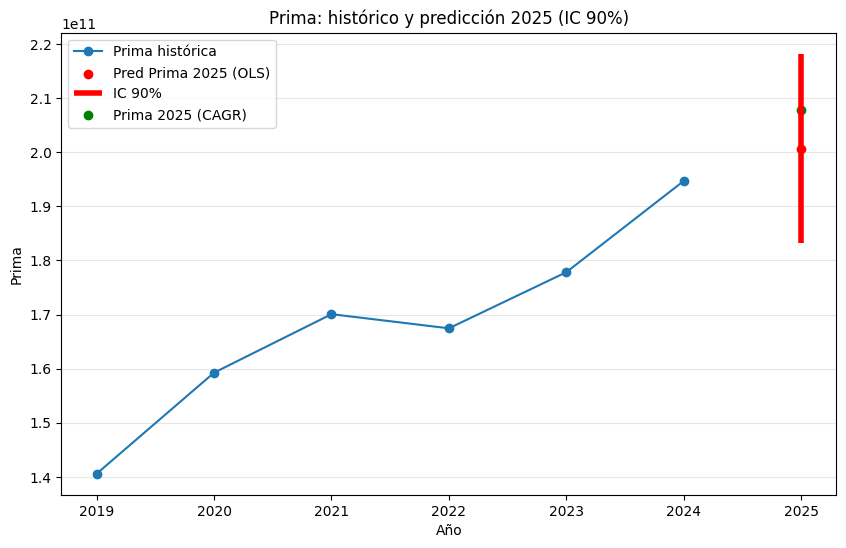

In [17]:
# Gráfico: Prima histórica + OLS 2025 + CAGR 2025 (IC 90%)
pred_prima_mean = pred_prima_2025['mean'].iloc[0]
pred_prima_low = pred_prima_2025['obs_ci_lower'].iloc[0]
pred_prima_up = pred_prima_2025['obs_ci_upper'].iloc[0]

plt.figure(figsize=(10, 6))
plt.plot(df['Año'], df['Prima'], marker='o', label='Prima histórica')
plt.scatter([2025], [pred_prima_mean], color='red', label='Pred Prima 2025 (OLS)')
plt.vlines(2025, pred_prima_low, pred_prima_up, colors='red', linestyles='-', lw=4, label='IC 90%')
plt.scatter([2025], [prima_2025_cagr], color='green', label='Prima 2025 (CAGR)')
plt.title('Prima: histórico y predicción 2025 (IC 90%)')
plt.xlabel('Año')
plt.ylabel('Prima')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

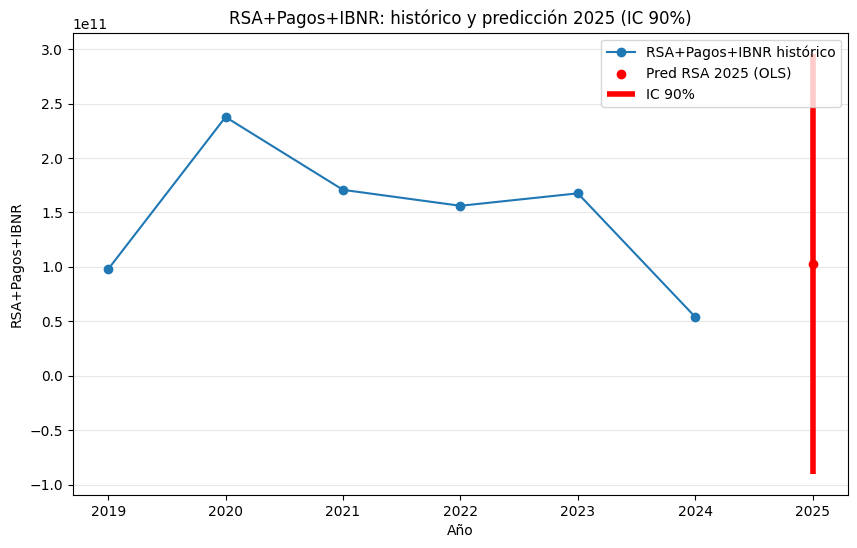

In [18]:
# Gráfico: RSA+Pagos+IBNR histórico + OLS 2025 (IC 90%)
pred_rsa = preds_rsa[0.10]
pred_rsa_mean = pred_rsa['mean'].iloc[0]
pred_rsa_low = pred_rsa['obs_ci_lower'].iloc[0]
pred_rsa_up = pred_rsa['obs_ci_upper'].iloc[0]

plt.figure(figsize=(10, 6))
plt.plot(df['Año'], df['RSA_Pagos_IBNR'], marker='o', label='RSA+Pagos+IBNR histórico')
plt.scatter([2025], [pred_rsa_mean], color='red', label='Pred RSA 2025 (OLS)')
plt.vlines(2025, pred_rsa_low, pred_rsa_up, colors='red', linestyles='-', lw=4, label='IC 90%')
plt.title('RSA+Pagos+IBNR: histórico y predicción 2025 (IC 90%)')
plt.xlabel('Año')
plt.ylabel('RSA+Pagos+IBNR')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

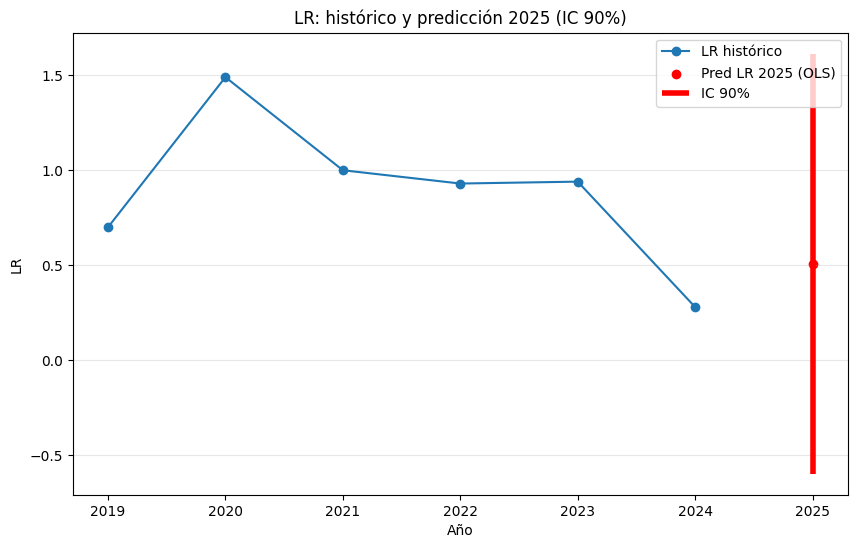

In [19]:
# Gráfico: LR histórico + OLS 2025 (IC 90%)
pred_lr = preds_lr[0.10]
pred_lr_mean = pred_lr['mean'].iloc[0]
pred_lr_low = pred_lr['obs_ci_lower'].iloc[0]
pred_lr_up = pred_lr['obs_ci_upper'].iloc[0]

plt.figure(figsize=(10, 6))
plt.plot(df['Año'], df['LR'], marker='o', label='LR histórico')
plt.scatter([2025], [pred_lr_mean], color='red', label='Pred LR 2025 (OLS)')
plt.vlines(2025, pred_lr_low, pred_lr_up, colors='red', linestyles='-', lw=4, label='IC 90%')
plt.title('LR: histórico y predicción 2025 (IC 90%)')
plt.xlabel('Año')
plt.ylabel('LR')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [20]:
# Tabla de intervalos de confianza (90%) para Prima, RSA_Pagos_IBNR y LR en 2025
alpha = 0.10
ci_prima = pred_prima_2025.iloc[0]
ci_lr = preds_lr[alpha].iloc[0]
ci_rsa = preds_rsa[alpha].iloc[0]

tabla_ic = pd.DataFrame([
    {
        'Métrica': 'Prima',
        'Alpha': alpha,
        'Media': ci_prima['mean'],
        'IC_inferior': ci_prima['obs_ci_lower'],
        'IC_superior': ci_prima['obs_ci_upper']
    },
    {
        'Métrica': 'RSA_Pagos_IBNR',
        'Alpha': alpha,
        'Media': ci_rsa['mean'],
        'IC_inferior': ci_rsa['obs_ci_lower'],
        'IC_superior': ci_rsa['obs_ci_upper']
    },
    {
        'Métrica': 'LR',
        'Alpha': alpha,
        'Media': ci_lr['mean'],
        'IC_inferior': ci_lr['obs_ci_lower'],
        'IC_superior': ci_lr['obs_ci_upper']
    }
])

tabla_ic

,Métrica,Alpha,Media,IC_inferior,IC_superior
0,Prima,0.1,2.006793e+11,1.831614e+11,2.181973e+11
1,RSA_Pagos_IBNR,0.1,1.028951e+11,-8.999901e+10,2.957891e+11
2,LR,0.1,5.080000e-01,-5.972154e-01,1.613215e+00


In [21]:
# Exportar la tabla a CSV
output_csv = 'tabla_ic_2025.csv'
#tabla_ic.to_csv(output_csv, index=False, sep=";",decimal=",")
print(f"Tabla exportada a: {output_csv}")

Tabla exportada a: tabla_ic_2025.csv
